In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings

import pandas as pd
import numpy as np
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

#  Carimento dei Dati

In [2]:
start_date = '30-11-2011'
end_date = '30-11-2021'
stocks = ['JPM', 'BLK', 'XOM', 'CVX', 'AAPL', 'TSLA']
xle_path = './data/BATS_XLE, 1D_bb421.csv'
xlf_path = ''
xlk_path = ''

In [3]:
stocks_df = web.DataReader(stocks, 'yahoo', start_date, end_date)
xle_df = pd.read_csv(xle_path, sep=',')

In [4]:
stocks_df.head()

Attributes  Adj Close                                                      \
Symbols           JPM         BLK        XOM        CVX       AAPL   TSLA   
Date                                                                        
2011-11-30  23.506088  132.182831  53.403648  68.145966  11.703035  6.548   
2011-12-01  23.119001  129.661804  52.972103  67.489807  11.878489  6.520   
2011-12-02  24.538332  130.908768  52.972103  67.397011  11.932686  6.660   
2011-12-05  25.433935  136.554977  53.410263  68.145966  12.034037  6.884   
2011-12-06  25.221428  134.347610  53.655903  69.166618  11.970963  6.974   

Attributes      Close                                     ...       Open  \
Symbols           JPM         BLK        XOM         CVX  ...        XOM   
Date                                                      ...              
2011-11-30  30.969999  172.039993  80.440002  102.820000  ...  78.419998   
2011-12-01  30.459999  167.410004  79.790001  101.830002  ...  80.199997   
2011-12-02  32.330002  169.020004  79.790001  101.690002  ...  80.669998   
2011-12-05  33.509998  176.309998  80.449997  102.820000  ...  80.879997   
2011-12-06  33.230000  173.460007  80.820000  104.360001  ...  80.629997   

Attributes                                    Volume                         \
Symbols            CVX       AAPL   TSLA         JPM        BLK         XOM   
Date                                                                          
2011-11-30  100.500000  13.617500  6.500  61412600.0  1388200.0  33953000.0   
2011-12-01  102.820000  13.662143  6.514  33189700.0   752500.0  17261100.0   
2011-12-02  103.040001  13.922500  6.566  90515100.0   618200.0  19461300.0   
2011-12-05  103.580002  14.053214  6.706  52207600.0  1009300.0  18295000.0   
2011-12-06  103.099998  14.018214  6.840  38782900.0   530100.0  20122700.0   

Attributes                                      
Symbols            CVX         AAPL       TSLA  
Date                                            
2011-11-30  13373200.0  405938400.0  3801500.0  
2011-12-01   7007200.0  387181200.0  5151000.0  
2011-12-02   6638100.0  379055600.0  4014000.0  
2011-12-05   6121800.0  357210000.0  5800500.0  
2011-12-06   7445000.0  283598000.0  4759000.0  

[5 rows x 36 columns]

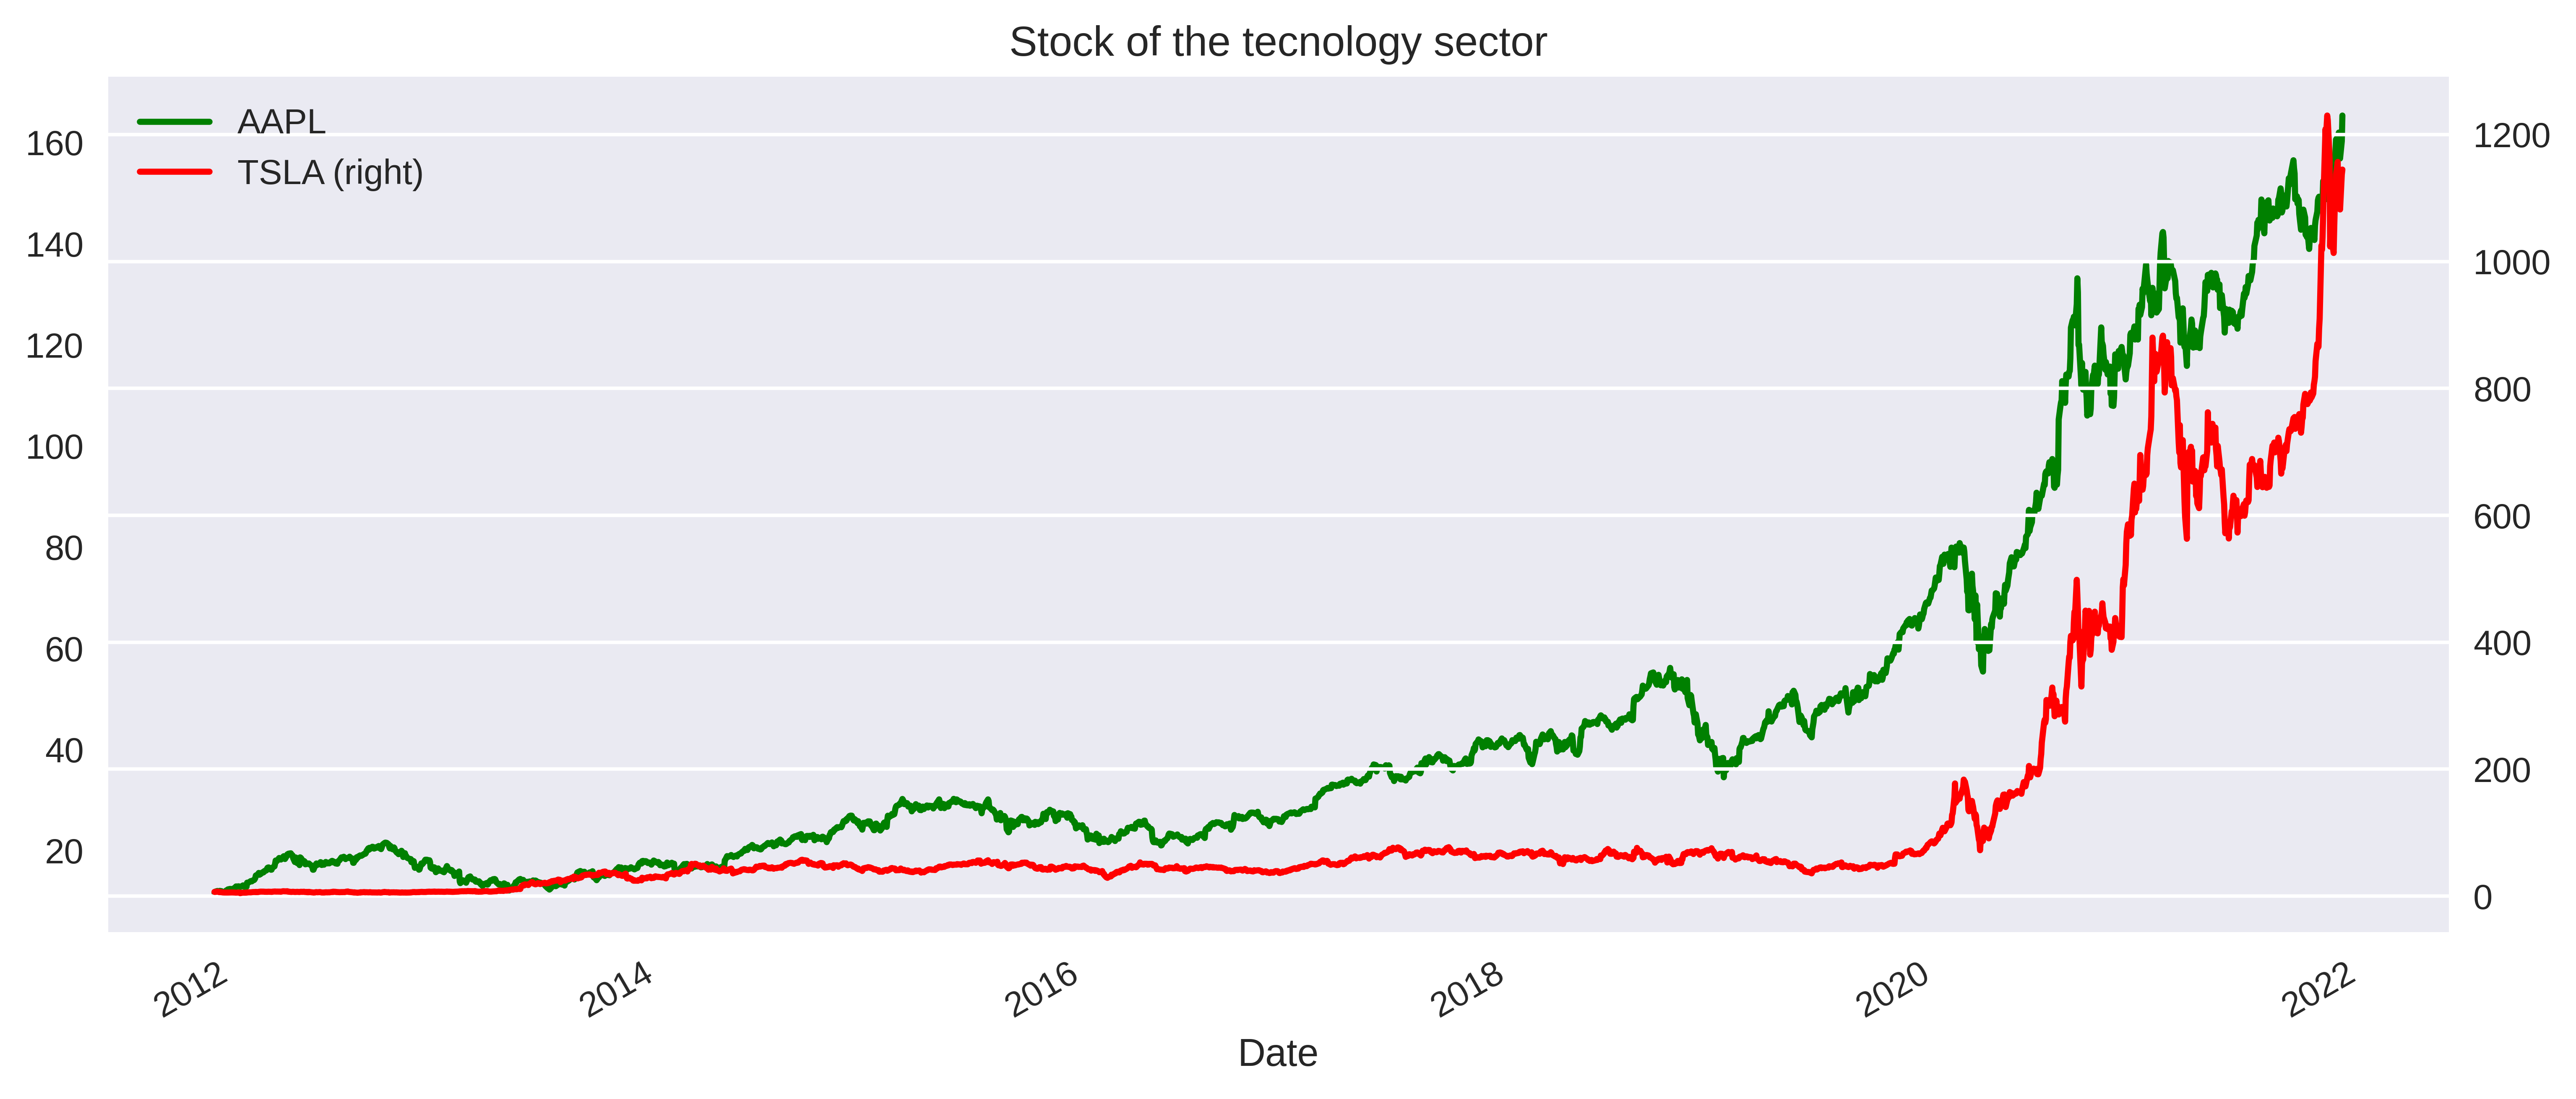

In [17]:
plt.figure(figsize=(12, 5))
plt.xlabel('Date')

ax1 = stocks_df['Adj Close'].loc[:, 'AAPL'].plot(color='green', label='AAPL', title='Stock of the technology sector')
ax2 = stocks_df['Adj Close'].loc[:, 'TSLA'].plot(color='red', secondary_y=True, label='TSLA')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

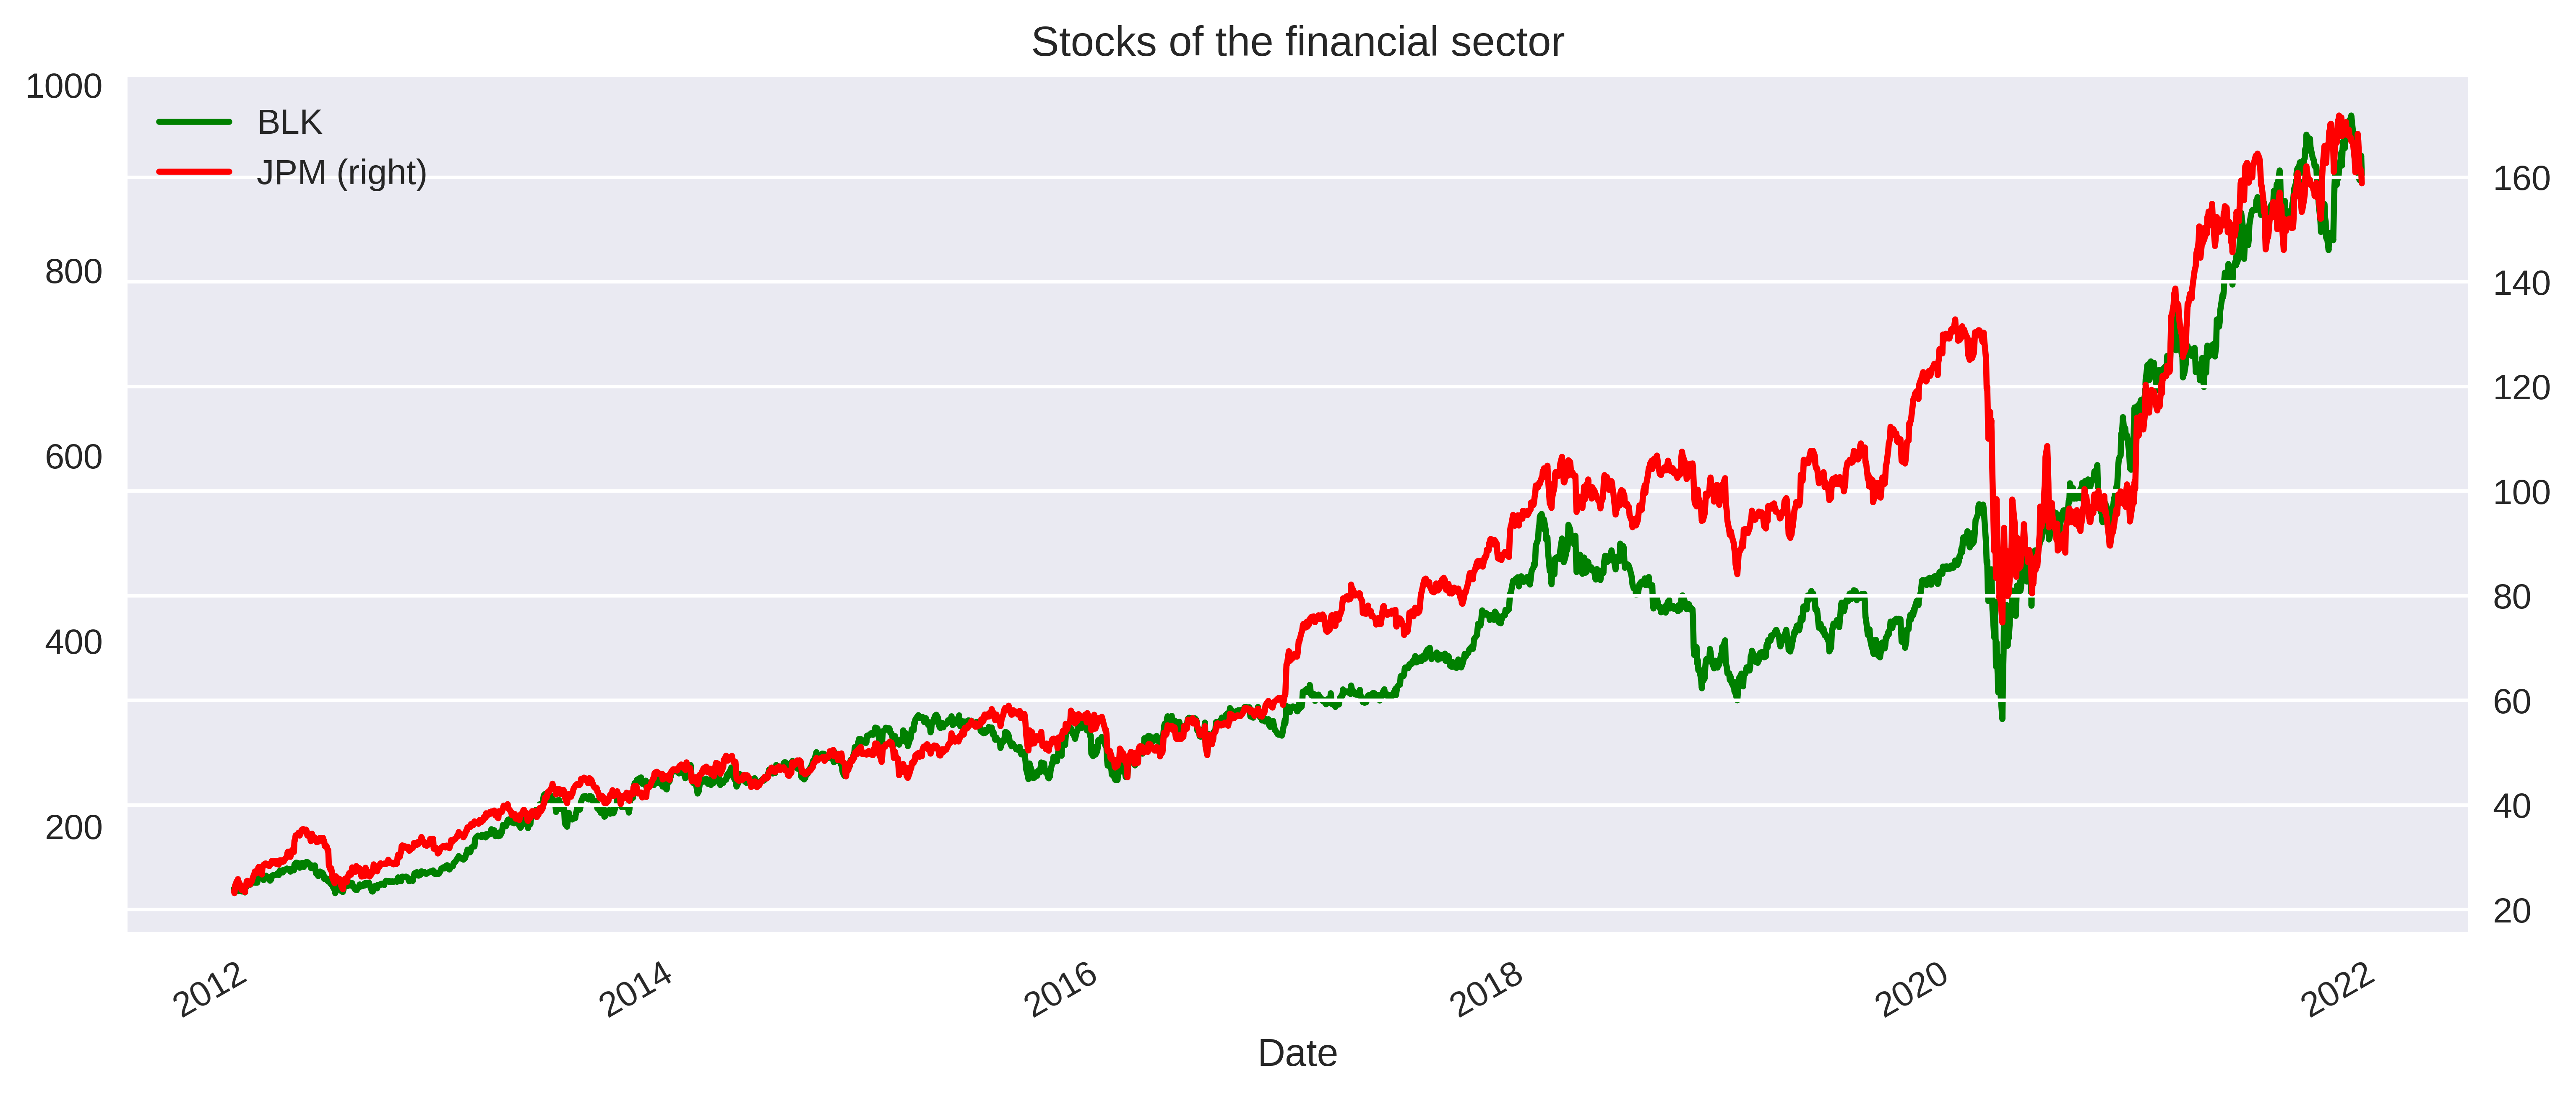

In [19]:
plt.figure(figsize=(12, 5))
plt.xlabel('Date')

ax1 = stocks_df['Adj Close'].loc[:, 'BLK'].plot(color='green', label='BLK', title='Stocks of the financial sector')
ax2 = stocks_df['Adj Close'].loc[:, 'JPM'].plot(color='red', secondary_y=True, label='JPM')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

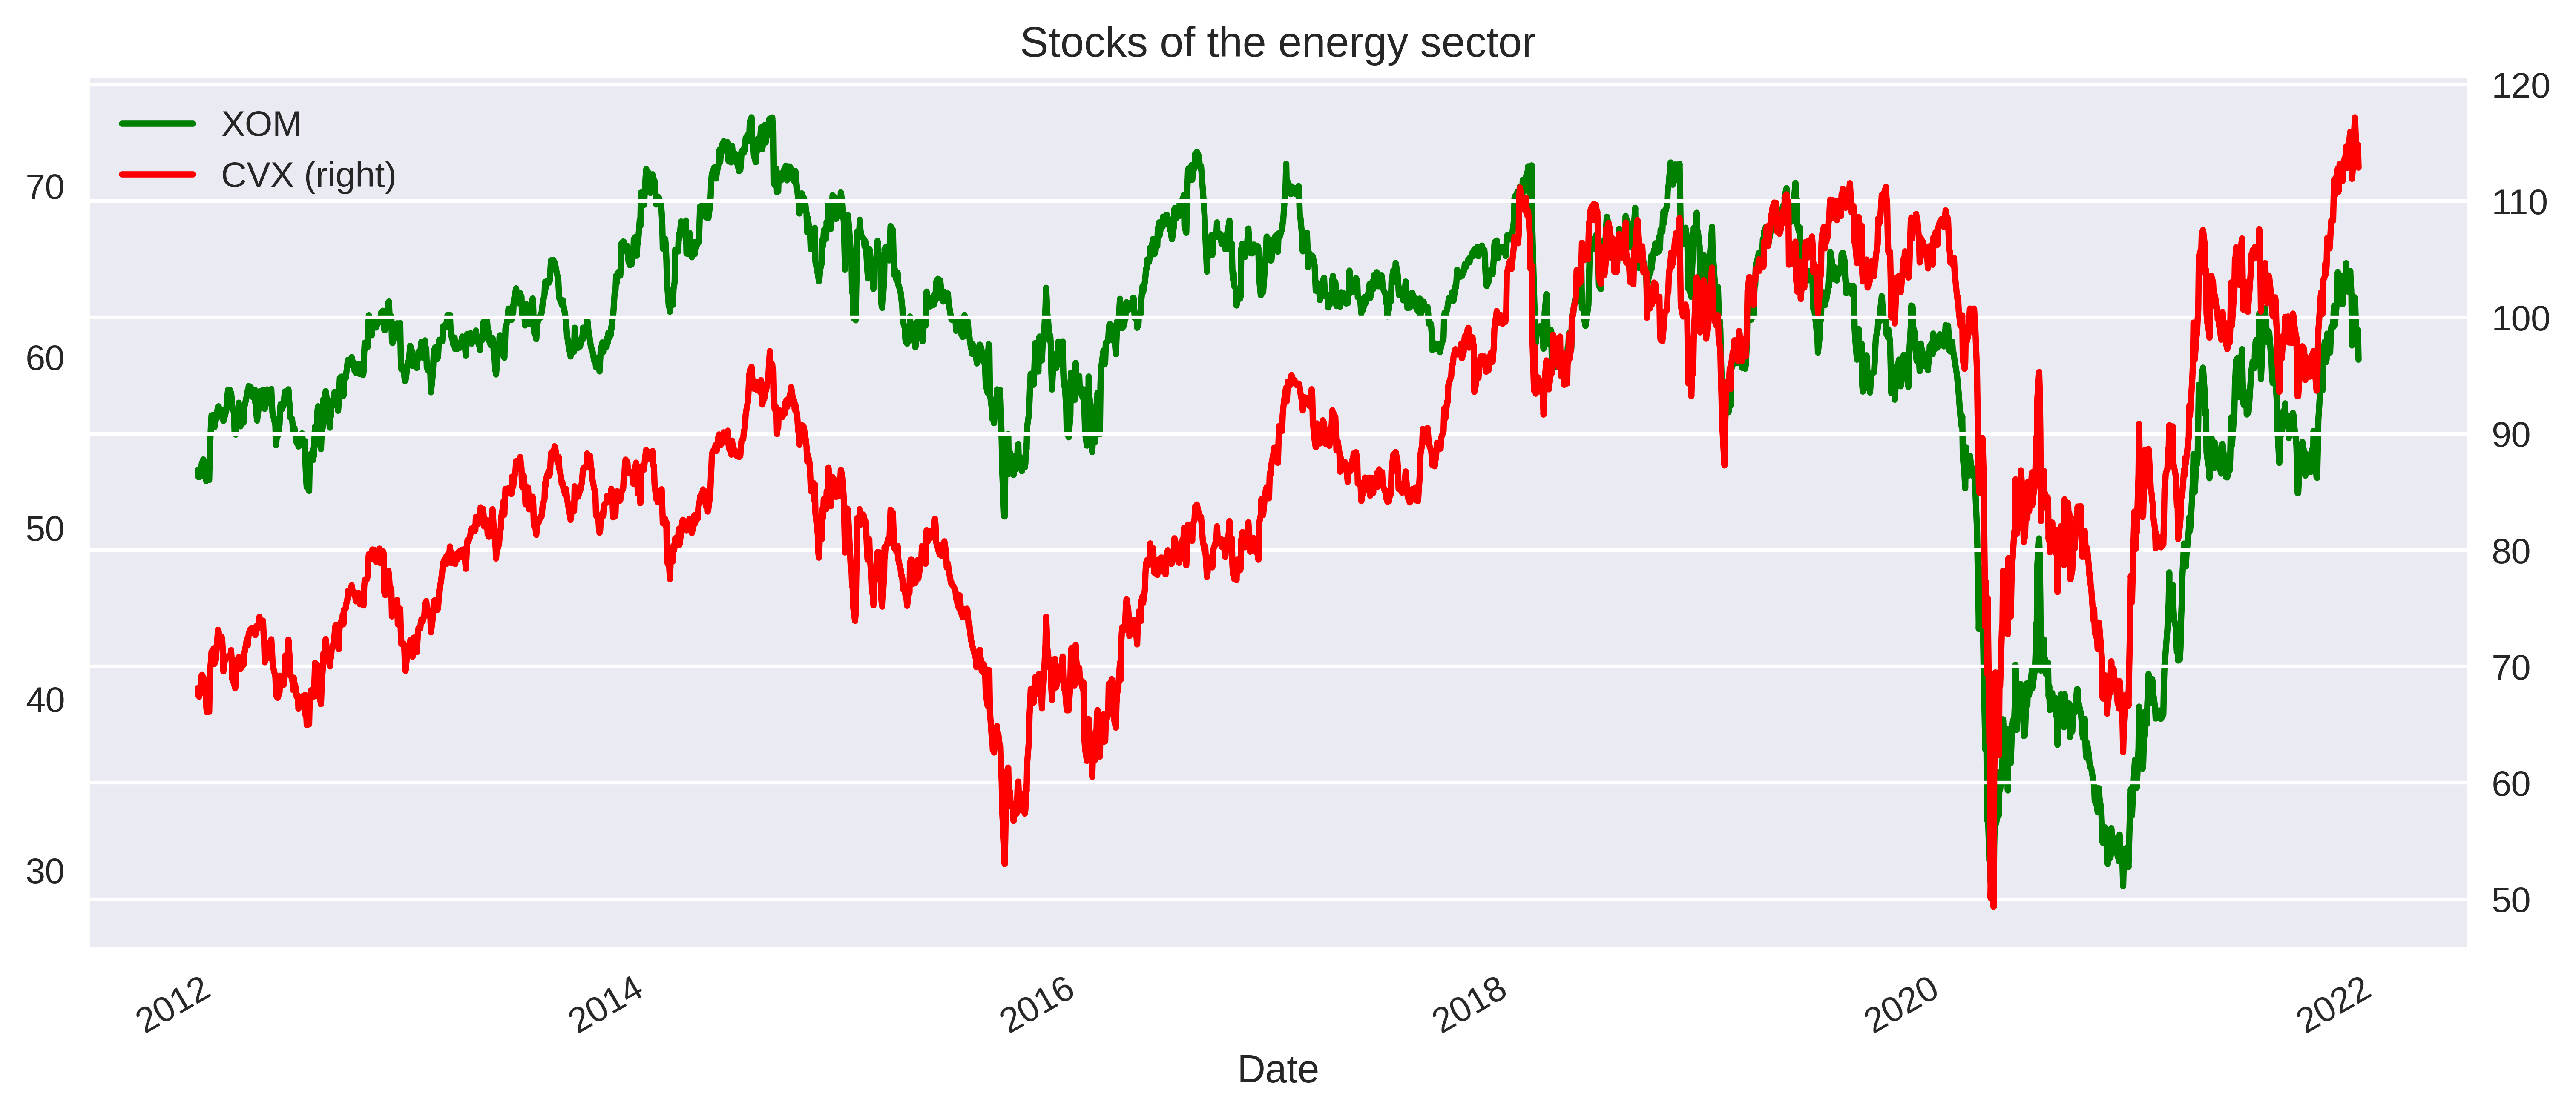

In [20]:
plt.figure(figsize=(12, 5))
plt.xlabel('Date')

ax1 = stocks_df['Adj Close'].loc[:, 'XOM'].plot(color='green', label='XOM', title='Stocks of the energy sector')
ax2 = stocks_df['Adj Close'].loc[:, 'CVX'].plot(color='red', secondary_y=True, label='CVX')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

# Analisi Eslorativa

# Rendimenti Semplici e Composti

In [27]:
returns_df = stocks_df['Adj Close'].pct_change().dropna()

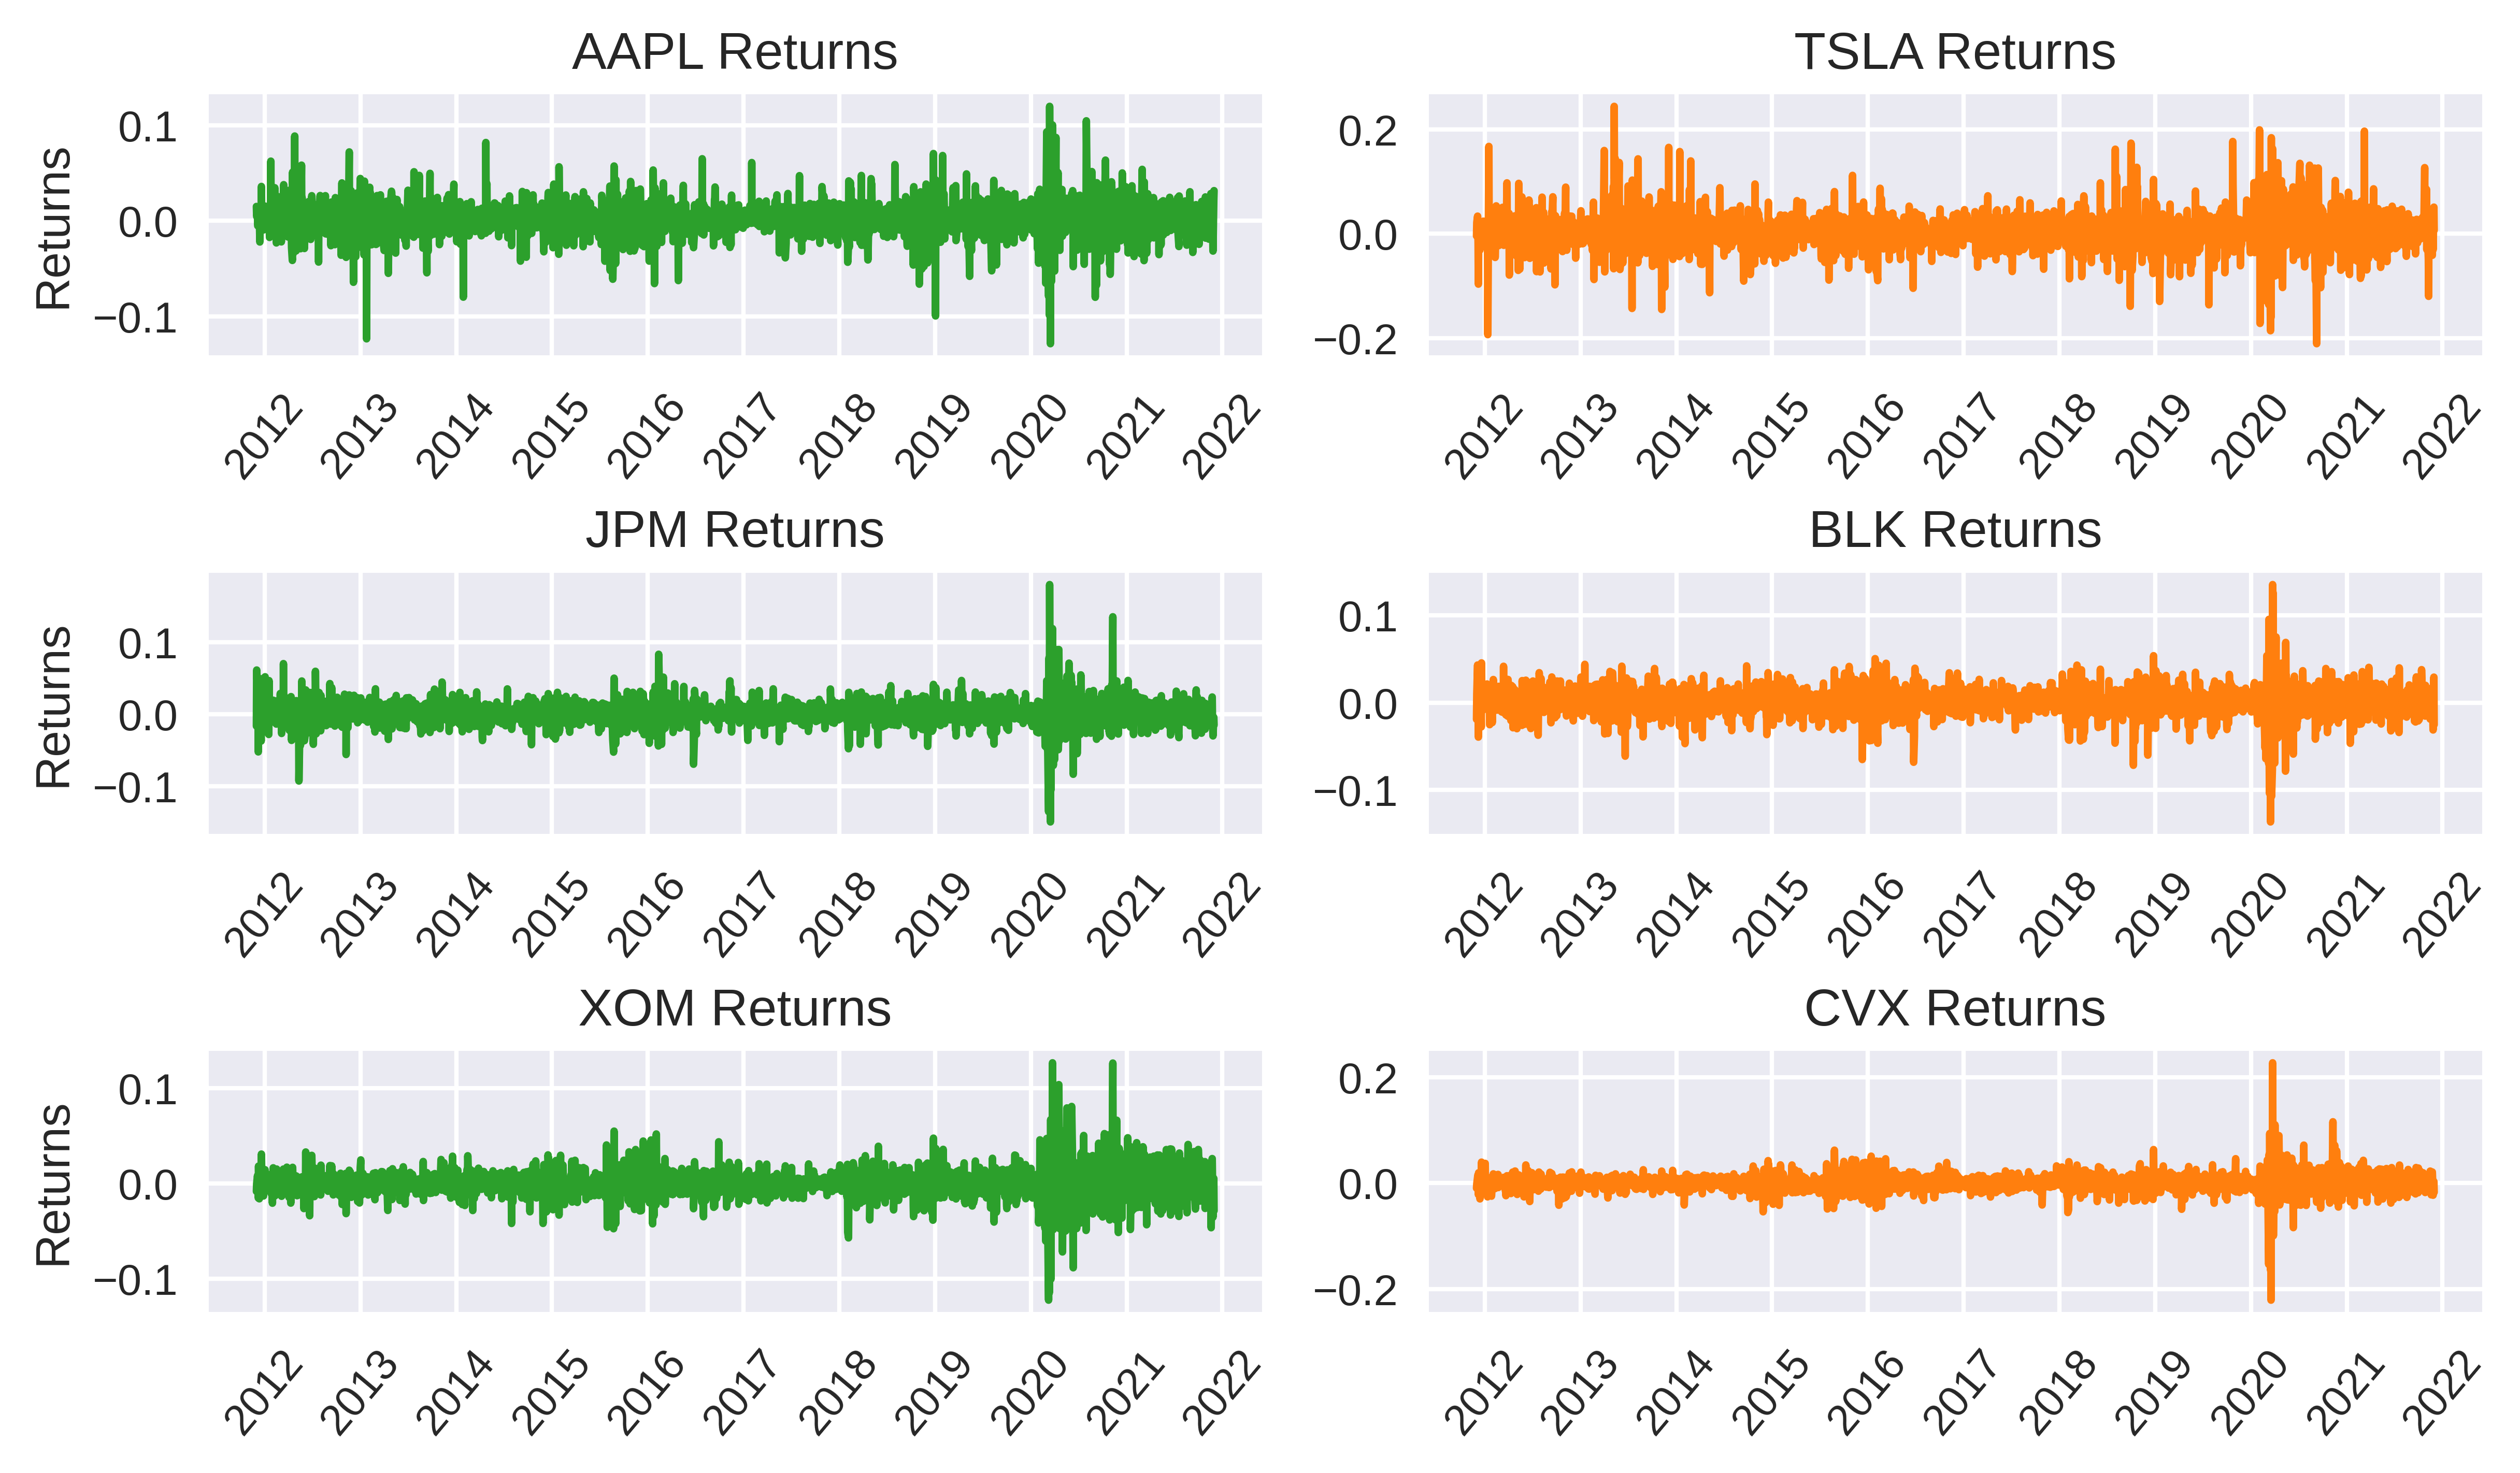

In [39]:
fig, axs = plt.subplots(3, 2)
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0, 0].set(ylabel='Returns',
       title='AAPL Returns')
axs[0, 0].plot(returns_df.loc[:, 'AAPL'], color=color_1)
axs[0, 0].tick_params(axis="x", rotation=50)
axs[0, 1].set(title='TSLA Returns')
axs[0, 1].plot(returns_df.loc[:, 'TSLA'], color=color_2)
axs[0, 1].tick_params(axis="x", rotation=50)

axs[1, 0].set(ylabel='Returns',
              title='JPM Returns')
axs[1, 0].plot(returns_df.loc[:, 'JPM'], color=color_1)
axs[1, 0].tick_params(axis="x", rotation=50)
axs[1, 1].set(title='BLK Returns')
axs[1, 1].plot(returns_df.loc[:, 'BLK'], color=color_2)
axs[1, 1].tick_params(axis="x", rotation=50)

axs[2, 0].set(ylabel='Returns',
              title='XOM Returns')
axs[2, 0].plot(returns_df.loc[:, 'XOM'], color=color_1)
axs[2, 0].tick_params(axis="x", rotation=50)
axs[2, 1].set(title='CVX Returns')
axs[2, 1].plot(returns_df.loc[:, 'CVX'], color=color_2)
axs[2, 1].tick_params(axis="x", rotation=50)

plt.show()

In [42]:
log_returns = np.log(stocks_df['Adj Close']/stocks_df['Adj Close'].shift(1)).dropna()

## Distribuzioni dei Ritorni Logaritmici

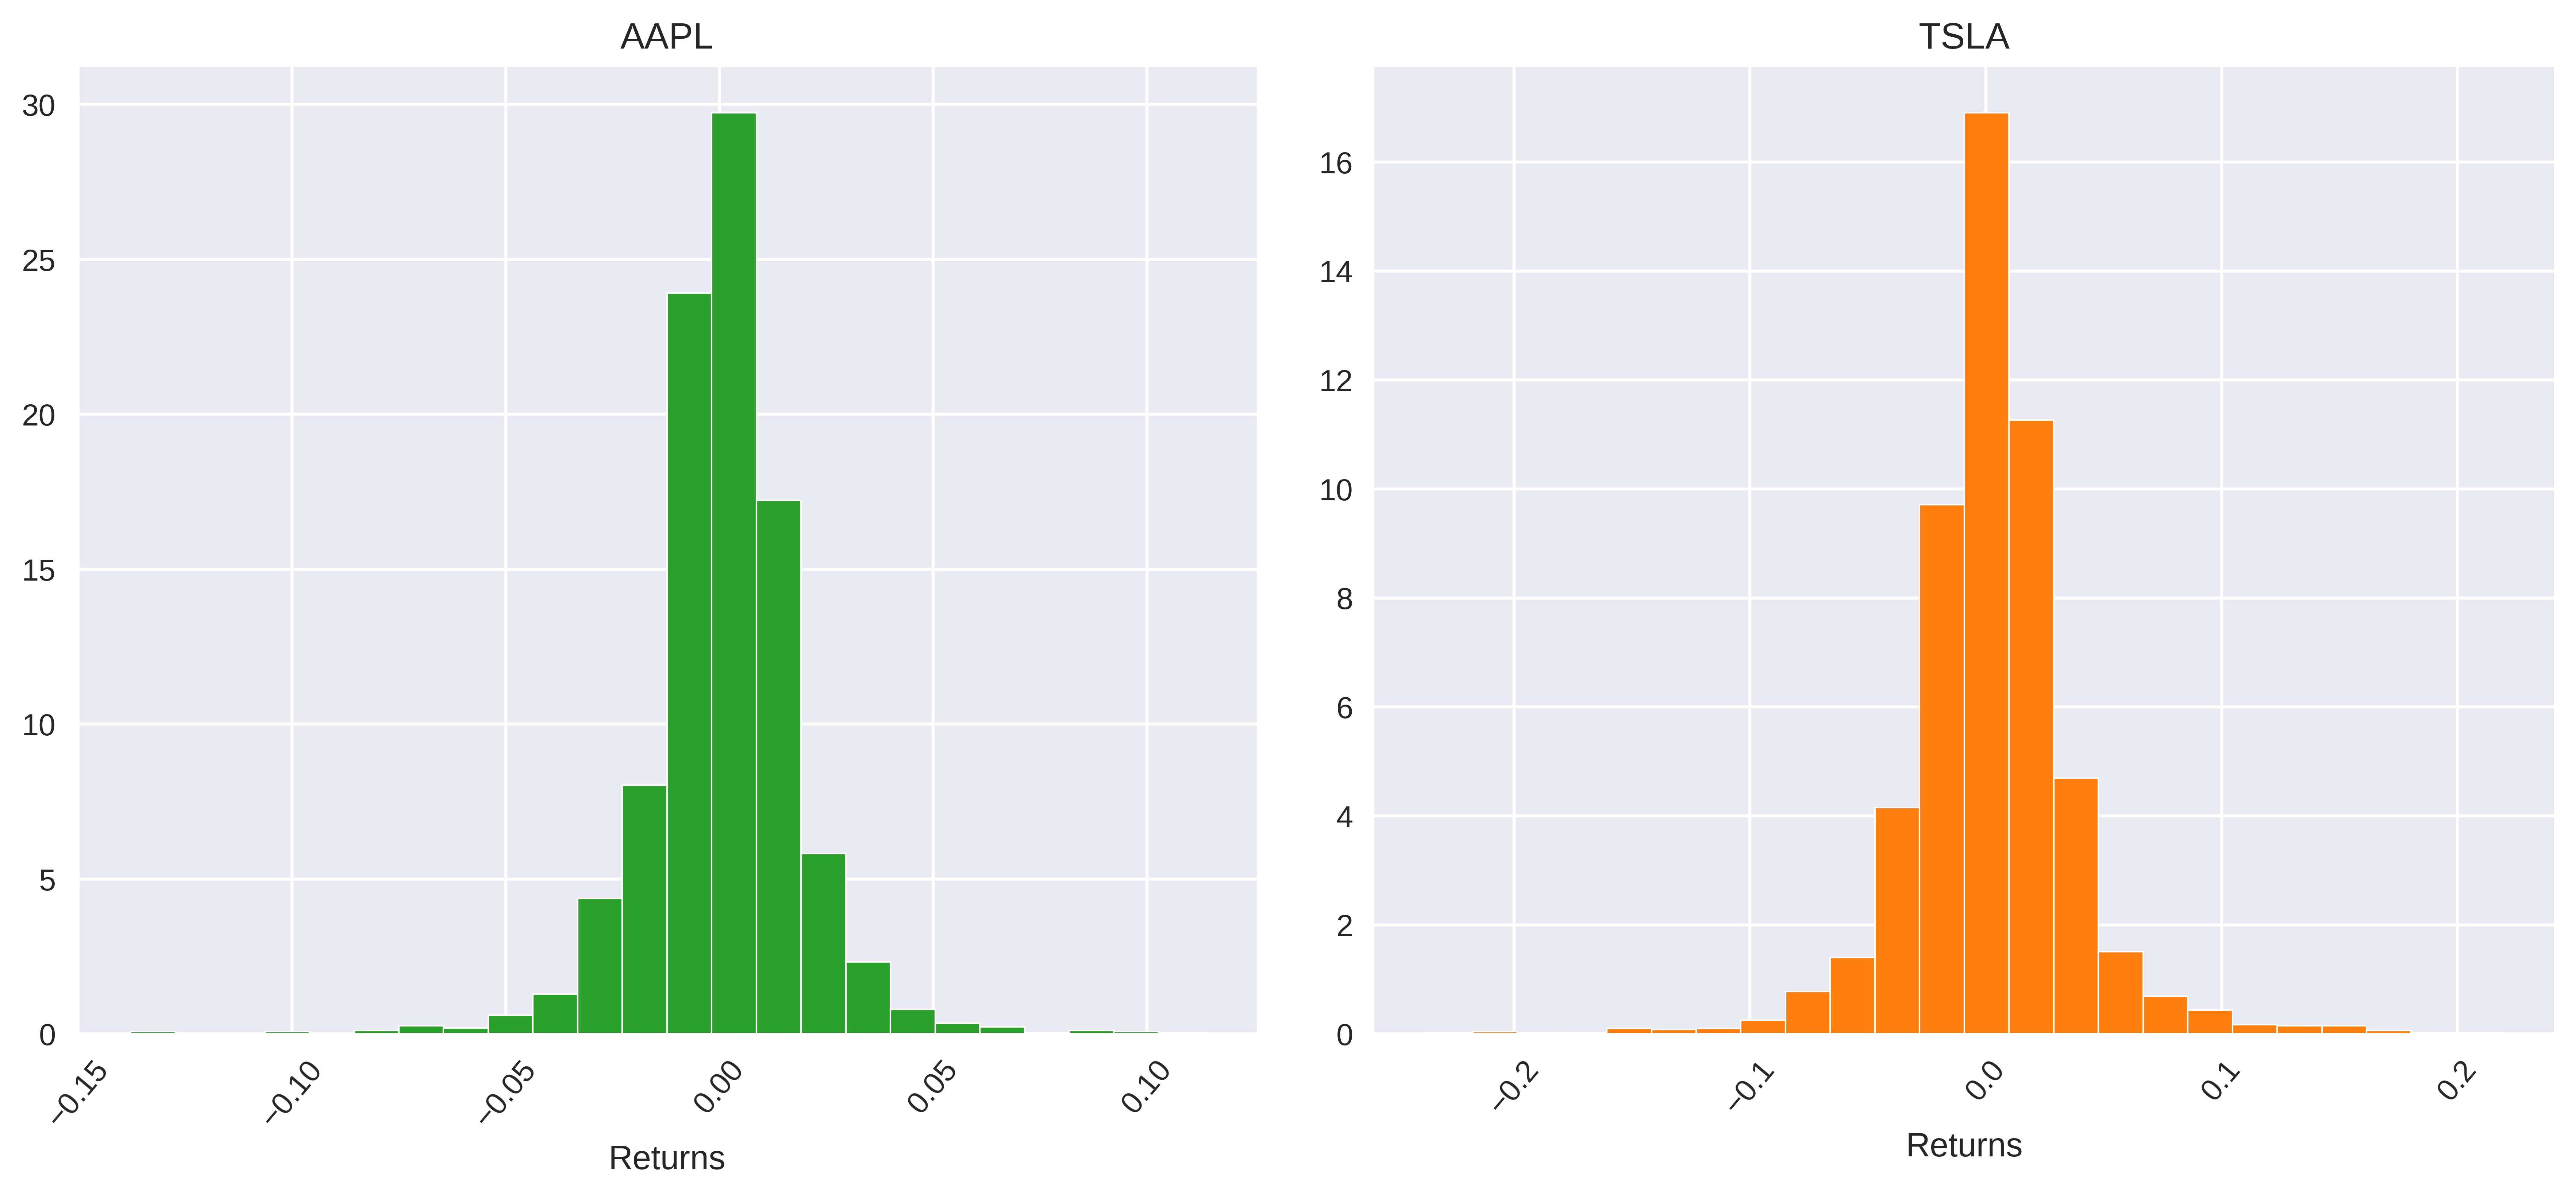

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0].set(xlabel='Returns',
              title='AAPL')
axs[0].hist(log_returns.loc[:, 'AAPL'], color=color_1, bins=24, linewidth=0.5, edgecolor="white", density=True)
axs[0].tick_params(axis="x", rotation=50)
axs[1].set(xlabel='Returns', title='TSLA')
axs[1].hist(log_returns.loc[:, 'TSLA'], color=color_2, bins=24, linewidth=0.5,edgecolor="white", density=True)
axs[1].tick_params(axis="x", rotation=50)

plt.show()

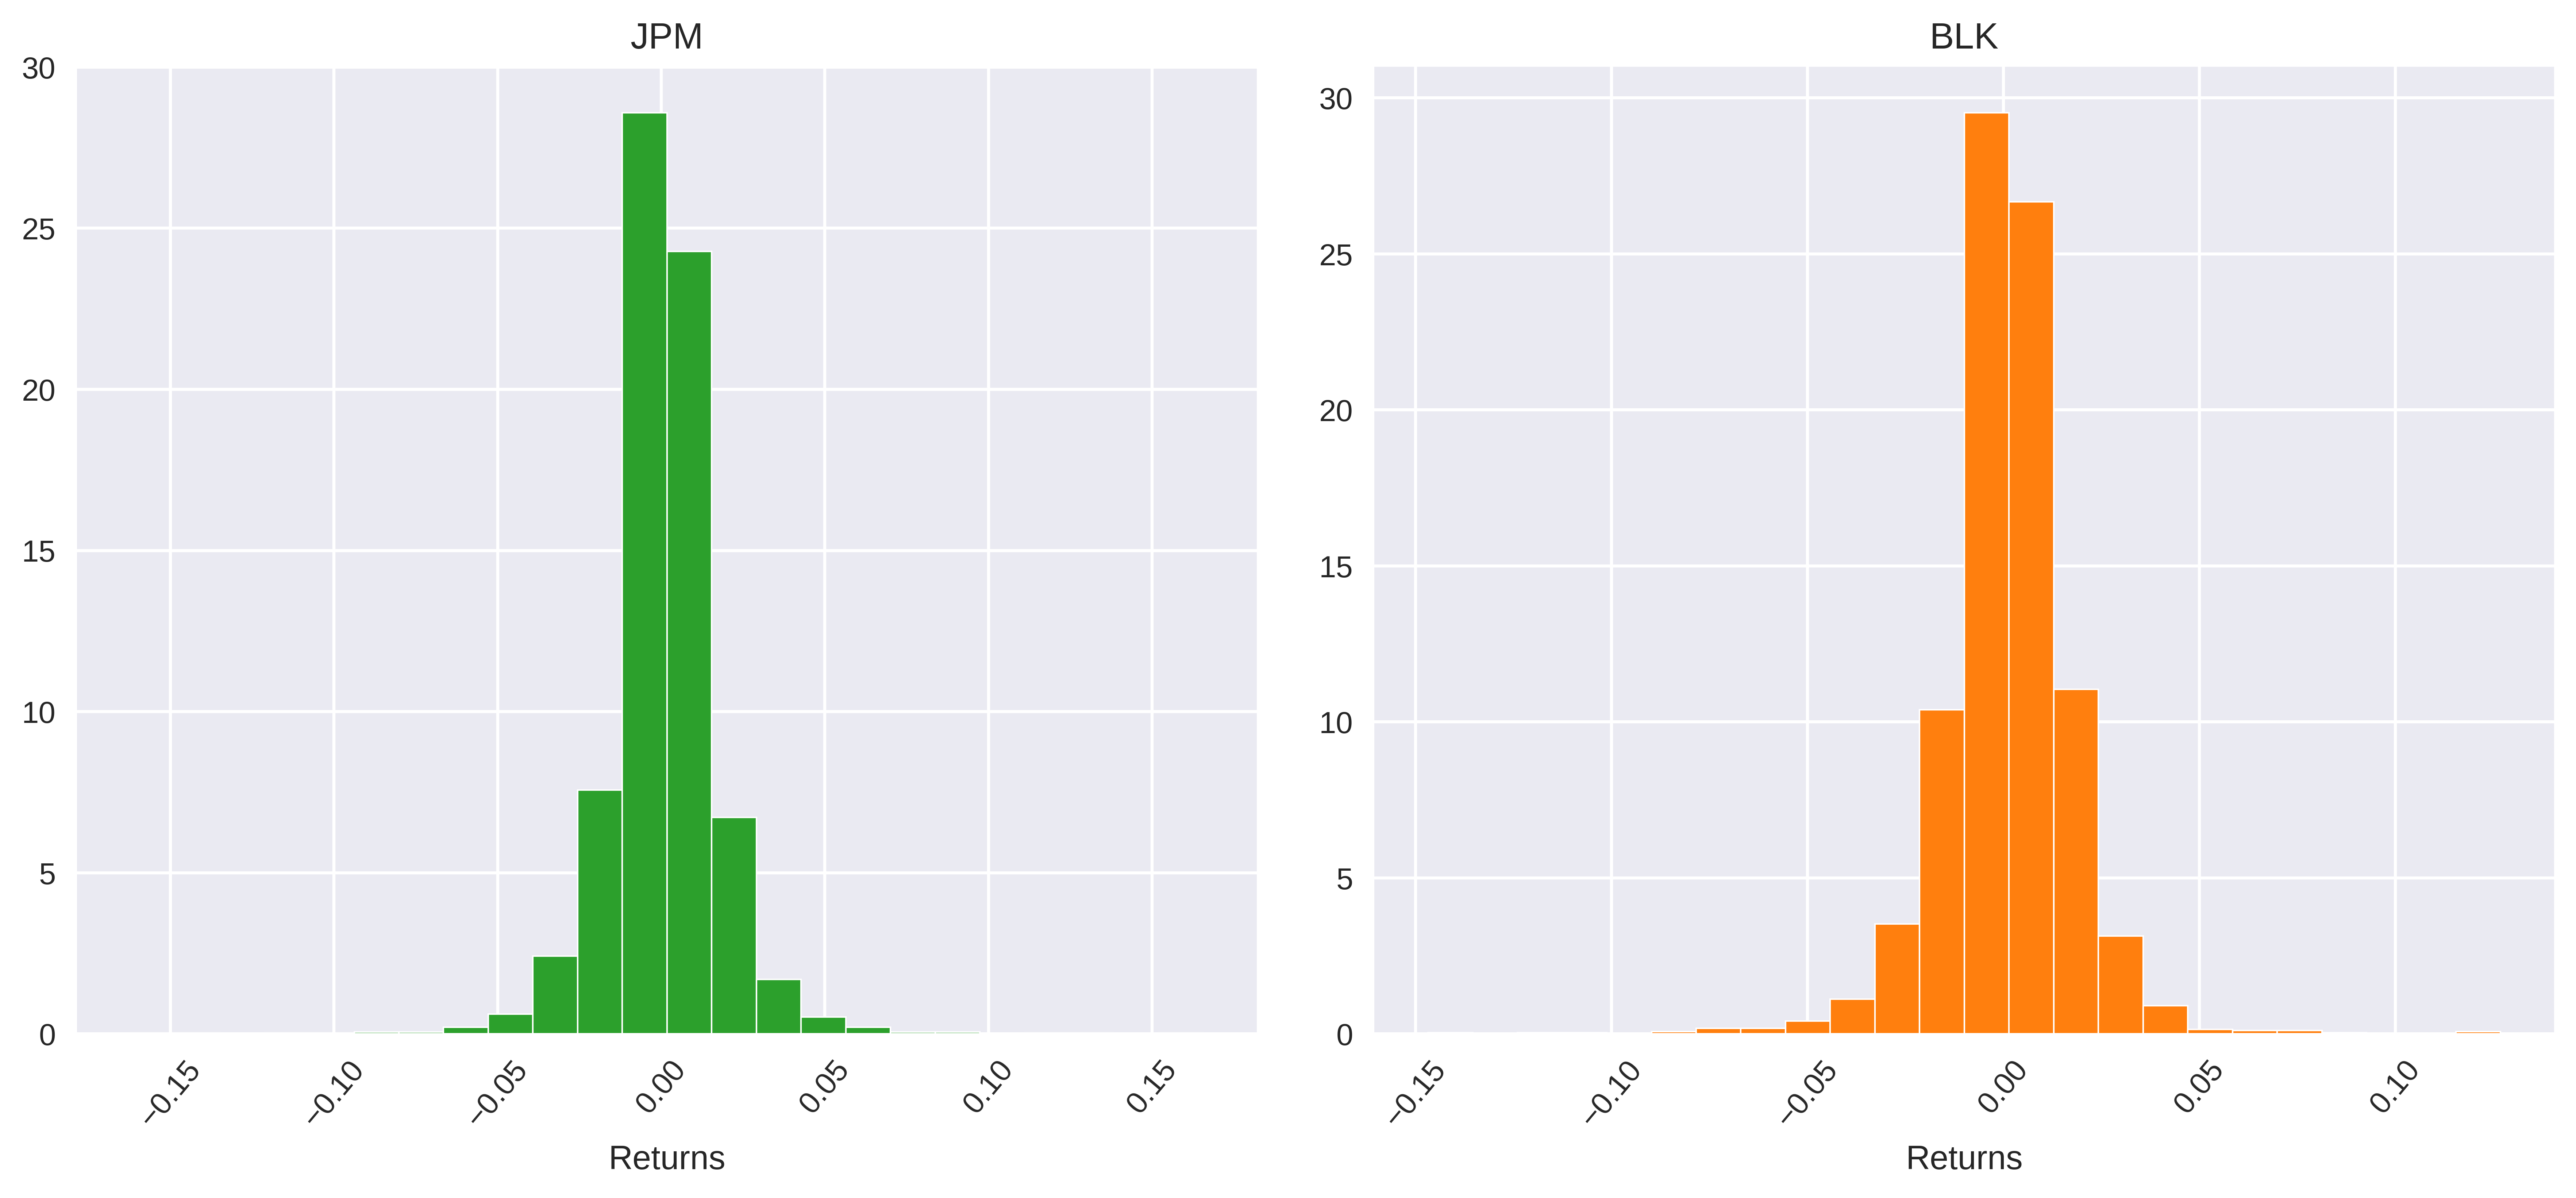

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0].set(xlabel='Returns',
           title='JPM')
axs[0].hist(log_returns.loc[:, 'JPM'], color=color_1, bins=24, linewidth=0.5, edgecolor="white", density=True)
axs[0].tick_params(axis="x", rotation=50)
axs[1].set(xlabel='Returns', title='BLK')
axs[1].hist(log_returns.loc[:, 'BLK'], color=color_2, bins=24, linewidth=0.5,edgecolor="white", density=True)
axs[1].tick_params(axis="x", rotation=50)

plt.show()

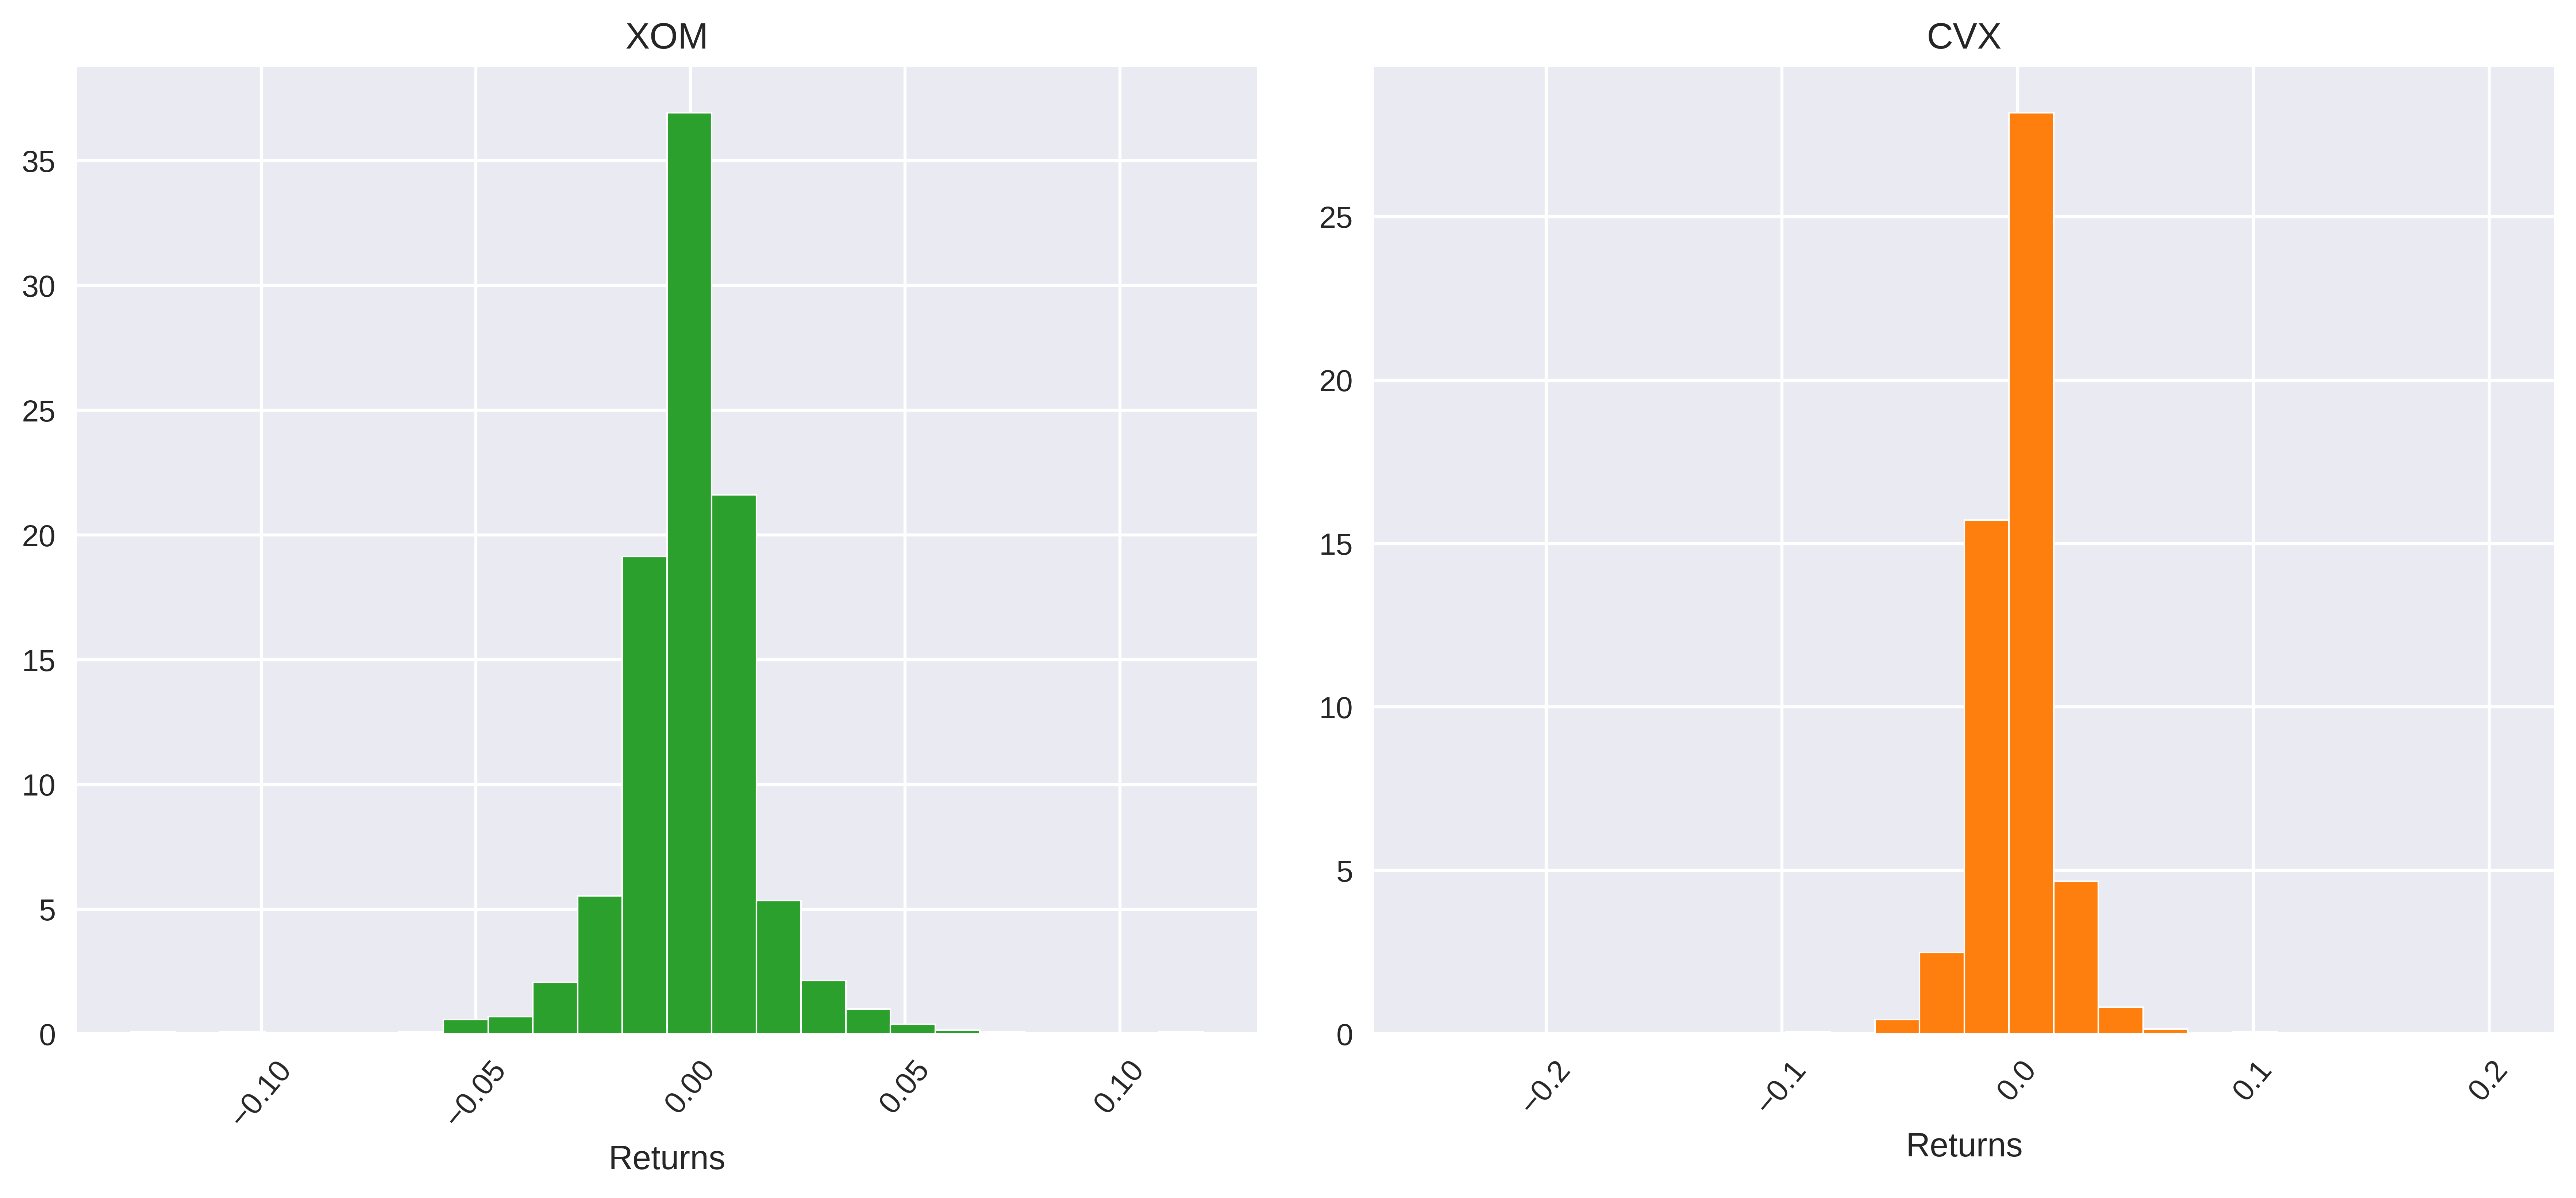

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0].set(xlabel='Returns',
           title='XOM')
axs[0].hist(log_returns.loc[:, 'XOM'], color=color_1, bins=24, linewidth=0.5, edgecolor="white", density=True)
axs[0].tick_params(axis="x", rotation=50)
axs[1].set(xlabel='Returns', title='CVX')
axs[1].hist(log_returns.loc[:, 'CVX'], color=color_2, bins=24, linewidth=0.5,edgecolor="white", density=True)
axs[1].tick_params(axis="x", rotation=50)

plt.show()